In [1]:
# sigmoid function
# logistic regression : one vs rest 

In [204]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [7]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y = data.target

In [37]:
lr = LogisticRegression(C=5.0, solver='sag', max_iter=1000, tol=0.001)
lr.fit(df,y)

C:\Users\Katlic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.001, verbose=0,
                   warm_start=False)

In [38]:
lr.coef_

array([[ 0.5427869 ,  1.943193  , -3.03861588, -1.34573858],
       [ 0.17466538, -2.27381214,  0.9483506 , -2.20712847],
       [-2.53462751, -2.53409694,  3.93568162,  4.36039808]])

In [18]:
lr.score(df,y)

0.9733333333333334

In [27]:
lr.predict([[6.3,3.4,6.2,2.3]])

array([2])

In [28]:
y[63]

1

In [26]:
df.iloc[100]

sepal length (cm)    6.3
sepal width (cm)     3.3
petal length (cm)    6.0
petal width (cm)     2.5
Name: 100, dtype: float64

In [42]:
def plot_boundaries(df, y, est=None, xlbl="", ylbl="", t=""):
    
    x_min, x_max = df.values[:, 0].min() - 1, df.values[:, 0].max() + 1
    y_min, y_max = df.values[:, 1].min() - 1, df.values[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 1, 1)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(df.values[:, 0], df.values[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.xlim(xx.min(), xx.max())
    plt.title(t)
    plt.show()

In [31]:
df2 = df.drop(['petal width (cm)', 'petal length (cm)'], axis=1)

In [32]:
df2.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [44]:
lr = LogisticRegression(C=5.0, solver='sag', max_iter=1000, tol=0.001)
lr.fit(df2,y)

C:\Users\Katlic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.001, verbose=0,
                   warm_start=False)

In [45]:
lr.score(df2,y)

0.8

In [35]:
lr.coef_

array([[-3.91881861,  6.12262513],
       [ 0.21875508, -2.71153956],
       [ 2.16909535, -1.01730772]])

In [36]:
lr.intercept_

array([  2.0146009 ,   6.08693053, -10.70256363])

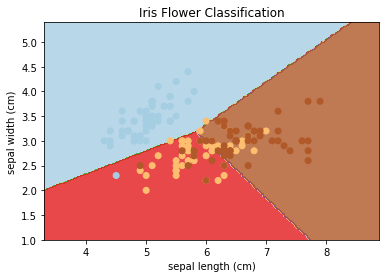

In [50]:
plot_boundaries(df2, y, est=lr, xlbl="sepal length (cm)", ylbl="sepal width (cm)", t="Iris Flower Classification")

In [51]:
data = pd.read_table('fruit_data_set.txt')

In [104]:
data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [143]:
training = data.drop(['fruit_subtype', 'fruit_name'], axis=1)

In [144]:
training.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [145]:
output = data['fruit_name']

In [146]:
output.head()

0       apple
1       apple
2       apple
3    mandarin
4    mandarin
Name: fruit_name, dtype: object

In [147]:
lr = LogisticRegression(C=5.0, solver='sag', max_iter=10000, tol=0.001, multi_class="ovr")
lr.fit(training,output)
x = lr.score(training,output)
print("accuracy % : ", x*100)

accuracy % :  79.66101694915254


In [148]:
x = lr.predict([training.values[50]])
print("fruit name is : ", x[0])

fruit name is :  lemon


In [151]:
lr.predict([[3,142,7.6,7.8,0.75]])

array(['lemon'], dtype=object)

# Nearest neighbour

In [142]:
data.sort_values('mass')

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
7,2,mandarin,mandarin,76,5.8,4.0,0.81
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
4,2,mandarin,mandarin,84,6.0,4.6,0.79
3,2,mandarin,mandarin,86,6.2,4.7,0.80
56,4,lemon,unknown,116,5.9,8.1,0.73
55,4,lemon,unknown,116,6.3,7.7,0.72
54,4,lemon,unknown,116,6.1,8.5,0.71
51,4,lemon,unknown,116,6.0,7.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [169]:
neigh.fit(training, output)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [170]:
neigh.predict([[3,142,7.6,7.8,0.75]])[0]

'orange'

In [171]:
neigh.predict([[3,363,9.6,9.2,0.74]])[0]

'orange'

In [172]:
neigh.predict([[4,216,7.3,10.2,0.71]])[0]

'lemon'

## Naise bayse Theorem

In [173]:
dataset = pd.read_csv('red-wine.csv')

In [178]:
dataset.head(80)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.9986,3.54,0.66,10.5,5
76,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.9986,3.54,0.66,10.5,5
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.9966,3.52,0.55,10.7,6
78,6.7,0.750,0.12,2.0,0.086,12.0,80.0,0.9958,3.38,0.52,10.1,5


In [180]:
training = dataset.drop(['quality'], axis=1)

In [182]:
output = dataset.quality

In [197]:
lr = LogisticRegression(C=5.0, solver='sag', max_iter=30000, tol=0.0001, multi_class="ovr")
lr.fit(training,output)

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=30000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
lr.score(training,output)

0.5803627267041901

In [203]:
lr.predict([training.values[0]])[0]

5

In [206]:
clf = GaussianNB()
clf.fit(training, output)

GaussianNB(priors=None, var_smoothing=1e-09)

In [210]:
clf.predict([training.values[0]])[0]

5